In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\angad\\Downloads\\SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.corr()
#corelation b/w coloumns

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Analizing profits on the basis of sales category

In [9]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [16]:
df[df["Category"]=="Office Supplies"].Profit.sum()

122490.8008

In [17]:
df[df["Category"]=="Furniture"].Profit.sum()

18451.272800000006

In [18]:
df[df["Category"]=="Technology"].Profit.sum()

145454.9481

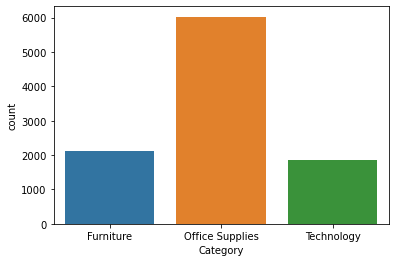

In [19]:
sns.countplot(df['Category'])

In [20]:
#finding mean for all the categorys seperately to find the profit per item sold
#office supply
df[df['Category']=='Office Supplies'].Profit.sum()/len(df[df['Category']=='Office Supplies'])

20.3270495851311

In [21]:
#furniture
df[df['Category']=='Furniture'].Profit.sum()/len(df[df['Category']=='Furniture'])

8.699327109853845

In [22]:
#Technology
df[df['Category']=='Technology'].Profit.sum()/len(df[df['Category']=='Technology'])

78.75200221981592

#### using graphs to find any numerlical factors leading to better profits

C:\Users\angad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


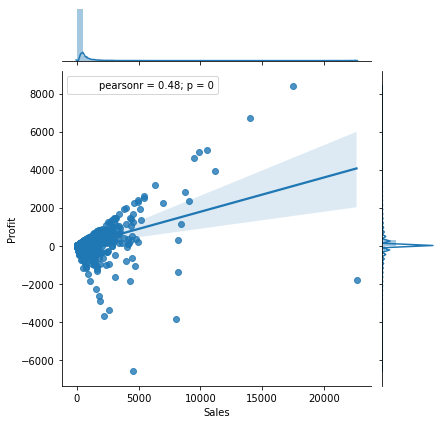

In [25]:
#plotting profit against sales,quantity and discount 
sns.jointplot(df['Sales'], df['Profit'], kind = "reg").annotate(stats.pearsonr)

##### sales effect profit marginally

C:\Users\angad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


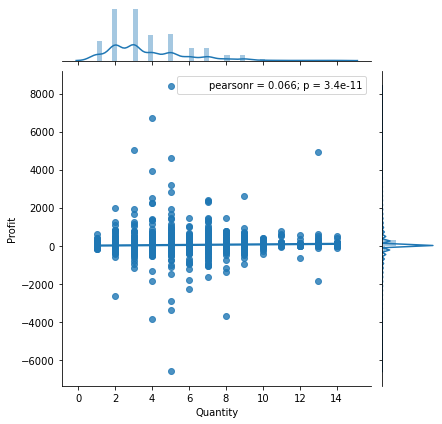

In [26]:
sns.jointplot(df['Quantity'], df['Profit'], kind = "reg").annotate(stats.pearsonr)

C:\Users\angad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


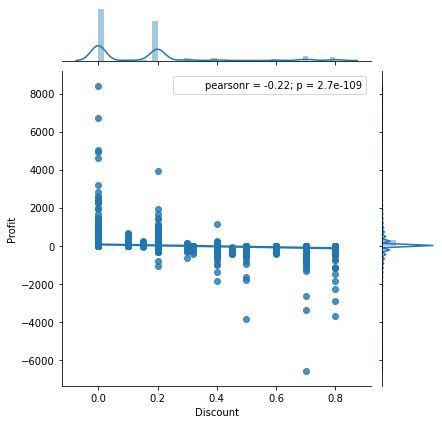

In [27]:
sns.jointplot(df['Discount'], df['Profit'], kind = "reg").annotate(stats.pearsonr)

###### quantity and discount effect sales marginally but the effect is soo low that we consider it net neutral 


### Analyzing profits on the basis of shipping mode

In [28]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [29]:
df[df['Ship Mode']=='Standard Class'].Profit.sum()

164088.7875

In [30]:
df[df['Ship Mode']=='Second Class'].Profit.sum()

57446.63540000001

In [31]:
df[df['Ship Mode']=='First Class'].Profit.sum()

48969.8399

In [32]:
df[df['Ship Mode']=='Same Day'].Profit.sum()

15891.7589

In [33]:
#finding mean for all the categorys seperately to find the profit per item shipped
#Standard class profit
df[df['Ship Mode']=='Standard Class'].Profit.sum()/len(df[df['Ship Mode']=='Standard Class'])

27.494770023458447

In [34]:
#Second class profit
df[df['Ship Mode']=='Second Class'].Profit.sum()/len(df[df['Ship Mode']=='Second Class'])

29.53554519280206

In [35]:
#First class profit
df[df['Ship Mode']=='First Class'].Profit.sum()/len(df[df['Ship Mode']=='First Class'])

31.839947919375813

In [36]:
#Same Day Profit
df[df['Ship Mode']=='Same Day'].Profit.sum()/len(df[df['Ship Mode']=='Same Day'])

29.266590976058932

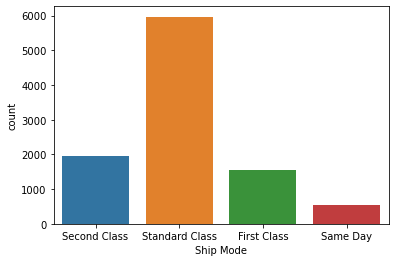

In [37]:
sns.countplot(df['Ship Mode'])

### Analyzing the Profits on the basis of different Segments

In [38]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [39]:
df[df['Segment']=='Consumer'].Profit.sum()

134119.2092

In [40]:
df[df['Segment']=='Corporate'].Profit.sum()

91979.13399999999

In [41]:
df[df['Segment']=='Home Office'].Profit.sum()

60298.678499999995

In [42]:
#finding mean for all the categorys seperately to find the profit on the basis of segment
#Consumer
df[df['Segment']=='Consumer'].Profit.sum()/len(df[df['Segment']=='Consumer'])

25.8368732806781

In [43]:
#Corporate
df[df['Segment']=='Corporate'].Profit.sum()/len(df[df['Segment']=='Corporate'])

30.456666887417217

In [44]:
#Home Office
df[df['Segment']=='Home Office'].Profit.sum()/len(df[df['Segment']=='Home Office'])

33.818664329781264

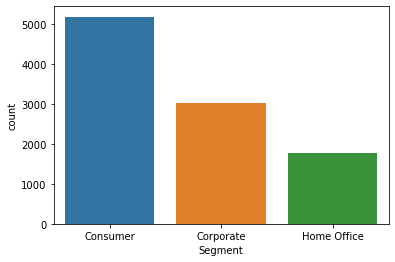

In [45]:
sns.countplot(df['Segment'])

####  Analyzing the profits on the basis of States

In [48]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

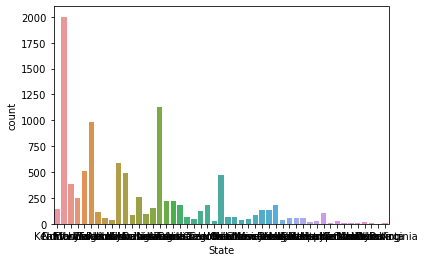

In [49]:
sns.countplot(df['State'])

In [62]:
c_list = {}
for x in df['State'].unique():
    mean_profit = df[df['State']==x].Profit.sum()/len(df[df['State']==x])
    c_list[x] = mean_profit

In [63]:
c_list

{'Kentucky': 80.57335683453238,
 'California': 38.17160774612694,
 'Florida': -8.87546135770235,
 'North Carolina': -30.083984738955827,
 'Washington': 66.01314565217392,
 'Texas': -26.12117390862944,
 'Wisconsin': 76.38000363636364,
 'Utah': 48.047801886792456,
 'Nebraska': 53.60774210526317,
 'Pennsylvania': -26.507598466780237,
 'Illinois': -25.62578658536585,
 'Minnesota': 121.60884719101122,
 'Michigan': 95.93406901960783,
 'Delaware': 103.93098750000001,
 'Indiana': 123.37541140939594,
 'New York': 65.63701117021277,
 'Arizona': -15.303234821428573,
 'Virginia': 83.02656428571429,
 'Tennessee': -29.189582513661204,
 'Alabama': 94.86598852459018,
 'South Carolina': 42.120395238095234,
 'Oregon': -9.600568548387098,
 'Colorado': -35.867351098901096,
 'Iowa': 39.460396666666675,
 'Ohio': -36.1863040511727,
 'Missouri': 97.51834090909091,
 'Oklahoma': 73.54478787878787,
 'New Mexico': 31.273408108108107,
 'Louisiana': 52.28815,
 'Connecticut': 42.82307073170732,
 'New Jersey': 75.176

# Problems:

#### 1.Mean/ Avg profit generated by Furniture is very low 
####   To get more profits furniture sales must be increased 

#### 2. Quantity of items sold is not increasing the profit generated per item sold
####      prices must be regulated to increase the profit for per item sold

#### 3. Discounts are not effecting profit fot per item sold
####     Discounts should be only used to lure in customers when there is an increase is supply


#### 4. Most customers using standard mode for shipping 
####     First class shipping must be prompted or promoted while user is purchasing an item 

#### 5. Alot of staes have -ve mean profits 
####    trying to increase profits in state with -ve mean profits by using methods like free shipping for  a given day of the week of free shiping for First 100 customers 